In [1]:
import sys
sys.path.append("../") 
#!pip install scipy pandas numpy matplotlib
from deeptrade.cmd_utils import make_vec_tradeenv
from deeptrade.args import *
import numpy as np
import pandas as pd
from datetime import datetime
from collections import defaultdict
#import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.animation as animation

[andyt-macbook-pro.local:02217] shmem: mmap: an error occurred while determining whether or not /var/folders/ln/pm1k8tvs57z23s8r7q2dx7d00000gn/T//ompi.andyt-macbook-pro.501/jf.0/143851520/sm_segment.andyt-macbook-pro.501.8930000.0 could be created.
/Users/andyt/miniconda3/envs/deeptrade/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/andyt/miniconda3/envs/deeptrade/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/andyt/miniconda3/envs/deeptrade/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518

In [2]:
import os
os.environ["DEEPTRADE_DATA"] = "/Users/andyt/work/deeptrade-data/"

config = load_config('config.json')
env_args, model_args = config['env'], config['model']
env_id = config['env_id']
env_args['report_detail'] = True
from pprint import pprint
pprint(config)
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True  # pylint: disable=E1101
#with tf.Session(config=config):
env = make_vec_tradeenv(
    env_id=env_id,
    num_env=1,
    env_args=env_args,
    seed=1, #config['seed'],
    is_training=True,
)

loading config from config.json
{'aux': False,
 'aux_targets': ['price'],
 'backprop_aux': False,
 'env': {'act_qty': 0.1,
         'allow_negative': True,
         'book_noise': 0.0,
         'burnin': 10,
         'done_fn': 2,
         'end_on_target': False,
         'episode_len': 1000,
         'eval_overlap': False,
         'fee': 0,
         'fill_type': 'realistic',
         'framestack': 20,
         'ladder_depth': 5,
         'level': 2,
         'match_type': 'optimistic',
         'max_inventory': 5,
         'meta': False,
         'neval': 0,
         'ntrain': 30,
         'ob_noise': 0.0,
         'ob_scale': 1,
         'obnorm': False,
         'product_id': 'BTC-USD',
         'report_detail': True,
         'rew_eta': 0,
         'rew_scale': 1,
         'reward_fn': 'log_pnl',
         'rewnorm': False,
         'start_fee': -1,
         'start_fn': 1,
         'state_fn': 'level',
         'step_type': 'match',
         'step_val': 1.0},
 'env_id': 'mo',
 'mode

/Users/andyt/work/deeptrade-data/gdax_book/BTC-USD/snapshots/match_1.0/2020-03-05.gz
(1, 66, 20)


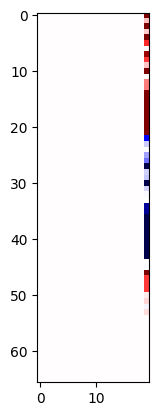

In [3]:
obs=env.reset()
print(obs.shape)
plt.imshow(obs[0].reshape(-1,env_args['framestack']), vmin=-2,vmax=2,cmap='seismic')

In [32]:
imgs=[]
def render(ob, t=None, animated=False):
    #ob = np.reshape(ob, (-1, nstack))
    im = plt.imshow(ob, cmap='seismic', vmin=-2, vmax=2, animated=animated)
    plt.xlabel('framestack')
    plt.ylabel('features')
    #plt.set_title(t)
    return im

        
# sample an episode from env using null policy
nenvs=env.num_envs
def null_policy(ob):
    return [0]*nenvs
def random_policy(ob):
    return [env.action_space.sample() for _ in range(nenvs)]

ANIMATE=False # alse
if ANIMATE:
    fig=plt.figure(figsize=(10,10))

policy = random_policy
step = 0
obs = env.reset()
lastob=None
aux_vars = []
ob_arr = []
info_arr = []
nstack=env_args['framestack']
while True:
    step += 1
    act = policy(obs)
    obs, rews, dones, infos = env.step(act)
    ob, rew, done, info = obs[0], rews[0], dones[0], infos[0]
    aux_vars.append(info.get('aux'))
    ob_arr.append(ob)
    info_arr.append(info)
    #if ANIMATE:
    #    imgs.append(render(ob, t=datetime.fromtimestamp(info['time']).isoformat(), animated=True))
    if done:
        break
    lastob=ob

In [16]:
info_arr[1]

{'step': 2,
 'time': 1583410387.956884,
 'seq': 12677625704,
 'inv': 0.1,
 'usd': 99089.018,
 'price': 9109.825,
 'bid': 9109.82,
 'ask': 9109.83,
 'map': 0.1,
 'apv': 0.0004999999946448952,
 'avg_fill_time': 0.0,
 'avg_fill_rate': 0,
 'n_realized': 1,
 'n_unrealized': 1,
 'deltap_rpnl': 0.0,
 'mean_rpnl': 0.0,
 'winrate_rpnl': 0.0,
 'fee': 0.0,
 'fees_paid': 0.0,
 'ep_len': 2,
 'lim_buy_pending': 0,
 'lim_sell_pending': 0,
 'ep_duration': 2.426536798477173,
 'price_delta': 0.9599999999991269,
 'spread': 0.01,
 'book_imbalance': 0.8176808000274364,
 'num_limit_orders_placed': 0,
 'num_limit_orders_filled': 0,
 'lim_buy_qty': 0,
 'lim_sell_qty': 0,
 'mkt_buy_qty': 0.1,
 'mkt_sell_qty': 0,
 'realized_pnl': 0.0,
 'unrealized_pnl': 0.0005,
 'avg_up': -0.005,
 'aux': {'spread': 1, 'ask': 1, 'bid': 1, 'price': 1}}

In [33]:
# auxiliary objectives (changes of different quantities)
aux_vars[:10]

[{'spread': 0, 'ask': 2, 'bid': 2, 'price': 2},
 {'spread': 0, 'ask': 1, 'bid': 2, 'price': 2},
 {'spread': 0, 'ask': 0, 'bid': 2, 'price': 2},
 {'spread': 0, 'ask': 2, 'bid': 2, 'price': 2},
 {'spread': 1, 'ask': 1, 'bid': 1, 'price': 1},
 {'spread': 0, 'ask': 2, 'bid': 2, 'price': 2},
 {'spread': 0, 'ask': 2, 'bid': 2, 'price': 2},
 {'spread': 1, 'ask': 1, 'bid': 1, 'price': 1},
 {'spread': 1, 'ask': 1, 'bid': 1, 'price': 1},
 {'spread': 1, 'ask': 1, 'bid': 1, 'price': 1}]

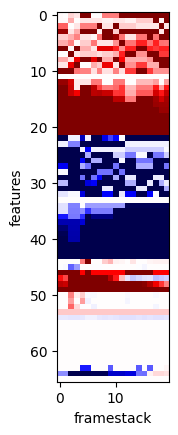

In [34]:
render(ob_arr[-2], t=datetime.fromtimestamp(info_arr[-2]['time']).isoformat())

496

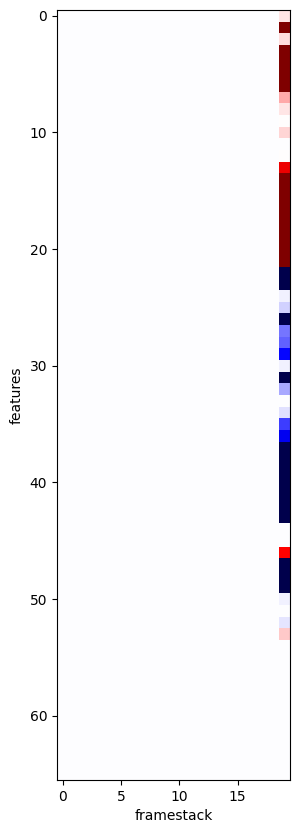

In [35]:
fig=plt.figure(figsize=(10,10))
imgarr = []
for ob, aux, info in zip(ob_arr, aux_vars, info_arr):
    imgarr.append(render(ob))#, t=datetime.fromtimestamp(info['time']).isoformat(), animated=True))
len(imgarr)

In [36]:
anim = animation.ArtistAnimation(fig, [[im] for im in imgarr], interval=50, blit=True)
#display(HTML(anim.to_html5_video()))
anim.save('anim_state.gif', writer='pillow')

In [5]:
from deeptrade.agent.policies import get_policy
from deeptrade.agent import ppo2
import tensorflow as tf
session = tf.InteractiveSession()

#with tf.Session(config=config):
policy = get_policy('ff_mlp')
model = ppo2.get_model(policy=policy, env=env, aux_targets=[], **model_args)
    


policy: arch=ff block=mlp

ff_policy: ob_space=Box(60, 100) ac_space=Discrete(3) batch=32 nsteps=256 nauxtargets=0

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





ff_policy: ob_space=Box(60, 100) ac_space=Discrete(3) batch=1 nsteps=1 nauxtargets=0

	model/fc0/w:0                  (6000, 64) 	384000 params
	model/fc1/w:0                  (64, 64) 	4096 params
	model/v/w:0                    (64, 1) 	64 params
	model/pi/w:0                   (64, 3) 	192 params
Total model parameters: 0.39 million
PPO2: Using Non-mpi optimizer
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [51]:
def convert(y):
    return y.item() if isinstance(y, np.int32) or isinstance(y, np.float32) else y

def play_episode(venv, model):
    env = venv.unwrapped.envs[0].unwrapped
    obs = venv.reset()
    #def initialize_placeholders(nlstm=256, **kwargs):
    #    return np.zeros((nenvs or 1, 2 * nlstm)), np.zeros((1))
    #state, dones = initialize_placeholders()#**extra_args)
    logkeys = ['apv', 'realized_pnl', 'unrealized_pnl', 'inv', 'price_delta', 'ep_duration', 'spread', 'fees_paid']
    epinfo, ep_bidfills, ep_askfills, ep_bidorders, ep_askorders = [], [], [], [], []
    actbuf, rewbuf, obbuf = [], [], []
    step = 0
    done = False
    nfills=0
    while not done:
        actions, vf, state, neglogp = model.step(obs)#, state=state, mask=dones)
        obs, rews, dones, infos = venv.step(actions)
        act, value, ob, rew, done, info = actions[0], vf[0], obs[0], rews[0], dones[0], infos[0]
        rewbuf.append(rew)
        actbuf.append(act)
        # fills since last step
        #print('step {} time={} seq={} act={} rew={:.3f} {}'.format(step, info['time'], info['seq'], act, rew, {k:round(info[k], 4) for k in logkeys}))
        time=info['time']
        for fill in env.fills[nfills:]:
            if fill['side']=='buy':
                ep_bidfills.append((fill['time'], fill['price'], fill['size']))
            else:
                ep_askfills.append((fill['time'], fill['price'], fill['size']))
        nfills=len(env.fills)
        # current orders
        bid_orders=defaultdict(float)
        ask_orders=defaultdict(float)
        for order in env.orders.values():
            if order['side']=='buy':
                bid_orders[float(order['price'])]+=float(order['size'])
            else:
                ask_orders[float(order['price'])] += float(order['size'])
        for fp,fs in bid_orders.items():
            ep_bidorders.append((time, fp, fs))
        for fp,fs in ask_orders.items():
            ep_askorders.append((time, fp, fs))

        epinfo.append({k:convert(v) for k,v in info.items()})
        obbuf.append(np.ravel(obs))
        step+=1
    
    ep_bidfills = np.asarray(ep_bidfills)
    ep_askfills = np.asarray(ep_askfills)
    ep_bidorders = np.asarray(ep_bidorders)
    ep_askorders = np.asarray(ep_askorders)
    return ep_bidfills, ep_askfills, ep_bidorders, ep_askorders, epinfo, actbuf, rewbuf, obbuf



In [36]:
episode = play_episode(env, model)

In [49]:
def plot_episode(ep_bidfills, ep_askfills, ep_bidorders, ep_askorders, epinfo, actbuf, rewbuf, obbuf):
    df_info = pd.DataFrame.from_records(epinfo)
    t_start=df_info['time'].ix[0]
    df_info['time'] = df_info['time']-t_start
    fig, axs = plt.subplots(4,1,sharex=True,figsize=(20,20))

    axs[0].plot(df_info['time'], df_info['price'], 'b', alpha=0.5, label='price')
    if len(ep_bidfills)>0:
        axs[0].plot(ep_bidfills[:,0]-t_start, ep_bidfills[:,1], 'gX', markersize=10, alpha=0.5)
    if len(ep_askfills)>0:
        axs[0].plot(ep_askfills[:,0]-t_start, ep_askfills[:,1], 'rX', markersize=10, alpha=0.5)
    if len(ep_bidorders)>0:
        axs[0].plot(ep_bidorders[:,0]-t_start, ep_bidorders[:,1], 'g_', alpha=0.5)
    if len(ep_askorders)>0:
        axs[0].plot(ep_askorders[:,0]-t_start, ep_askorders[:,1], 'r_', alpha=0.5)
    axs[0].legend()

    df_info.plot(ax=axs[1], x='time', y=['inv'])
    axs[1].axhline(0, ls='--')
    df_info.plot(ax=axs[2], x='time', y=['realized_pnl','unrealized_pnl','apv'])
    axs[2].axhline(0, ls='--')
    axs[3].plot(df_info['time'], rewbuf, label='rew')
    axs[3].axhline(0, ls='--')
    axs[3].legend()
    plt.show()

/Users/atwigg/.local/share/virtualenvs/deeptrade2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


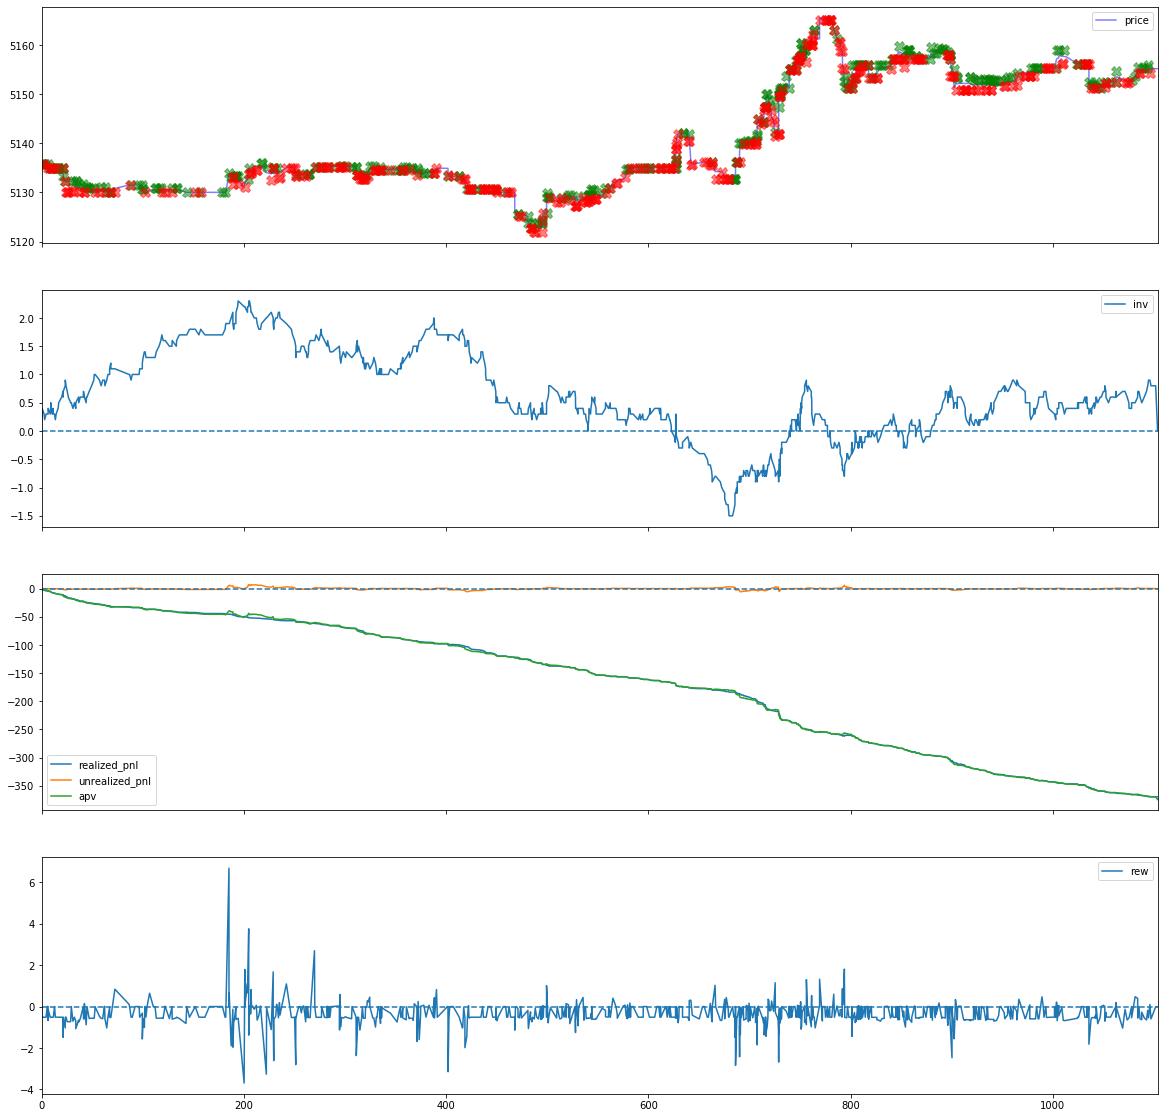

In [50]:
plot_episode(*episode)